<a href="https://colab.research.google.com/github/kaylangu/knn/blob/main/assignment_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/DS3001/knn`

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Q1.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [26]:
df = pd.read_csv('https://raw.githubusercontent.com/kaylangu/knn/main/data/USA_cars_datasets.csv')
df.head()
dropped_labels = ["Unnamed: 0", "brand", "model", "title_status", "color", "vin", "lot", "state", "country", "condition"] # first column is an attribute
for label in dropped_labels:
  df.drop(label, axis=1, inplace=True)
print(df.shape)
print(df.isna().sum())
df.head()

(2499, 3)
price      0
year       0
mileage    0
dtype: int64


,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [27]:
def maxmin_normalize(x):
  return (x-min(x))/(max(x)-min(x))

# df = df.loc[:, ["year", "mileage"]].apply(maxmin_normalize) is deleting price
df["year"] = maxmin_normalize(df["year"])
df["mileage"] = maxmin_normalize(df["mileage"])
df.head()

,price,year,mileage
0,6300,0.744681,0.269287
1,2899,0.808511,0.187194
2,5350,0.957447,0.038892
3,25000,0.872340,0.063016
4,27700,0.957447,0.006537


In [28]:
from sklearn.model_selection import train_test_split
y = df["price"]
X = df.drop("price", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

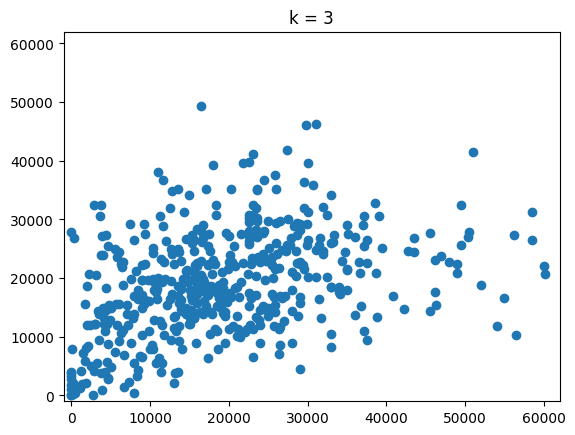

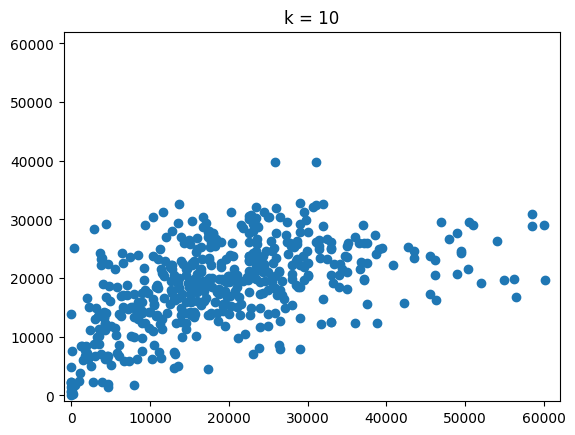

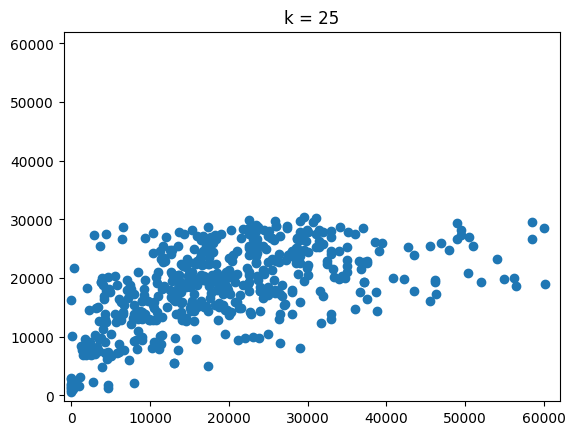

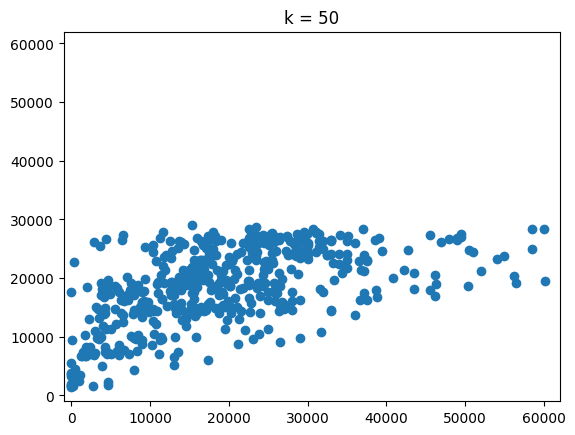

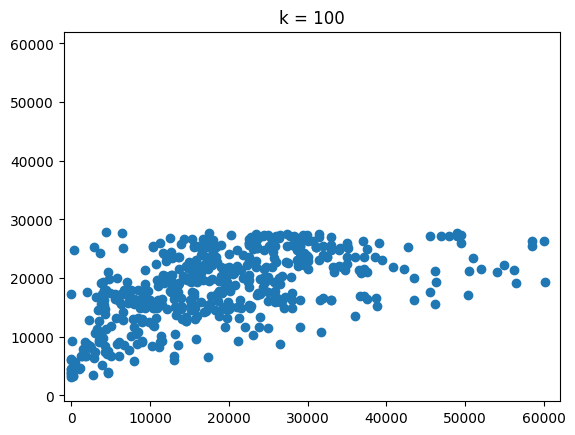

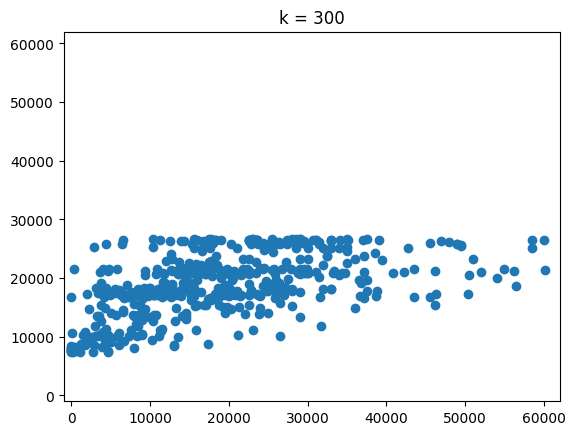

In [29]:
from sklearn.neighbors import KNeighborsRegressor

sse = []
k = [3, 10, 25, 50, 100, 300]
for k_i in k:
    model = KNeighborsRegressor(n_neighbors=k_i).fit(X_train,y_train)
    y_iter = model.predict(X_test)
    sse.append(np.sum((y_test-y_iter)**2))

    plot, axes = plt.subplots()
    plt.scatter(y_test,y_iter)
    plt.title('k = ' + str(k_i))
    axes.set_ylim(-1000, 62000)
    axes.set_xlim(-1000, 62000)
    plt.show()

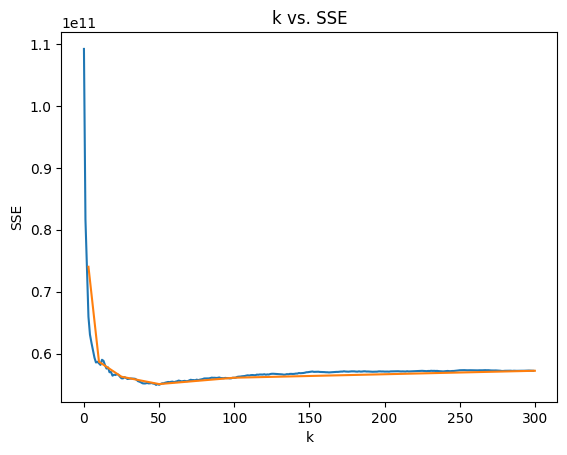

The optimal k-value of the ones tested above is 50
The optimal k-value of range [1, 150] is 49


In [30]:
k_test = np.arange(1,300)
sse_test = np.zeros(300)

for k in range(300):
    fitted_model = KNeighborsRegressor(n_neighbors=k+1).fit(X_train,y_train)
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    sse_test[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE

k = [3, 10, 25, 50, 100, 300]
plt.plot(np.arange(0,300), sse_test) # Plot SSE by k
plt.plot(k, sse)
plt.xlabel("k")
plt.title("k vs. SSE")
plt.ylabel('SSE')
plt.show()

index = np.where(sse==np.min(sse))[0]
print("The optimal k-value of the ones tested above is " + str(k[index[0]]))
min_index = np.where(sse_test==np.min(sse_test))[0]
print("The optimal k-value of range [1, 150] is " + str(k_test[min_index[0]]))


Among the tested k-values, the optimal k-value from the given list is 50, whereas testing the k-values from 1-150 was 49. This shows that for k-values lower than 50, the model is under-fitting, which would explain why the SSE values are so high. Likewise, the model would be overfitting for k-values above 50. This explains why the errors start to increase with higher values: the model is not testing as well because it is learning patterns specific to the training data.

**Q2.** This question is a case study for $k$ nearest neighbor. The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

In [31]:
url = "https://raw.githubusercontent.com/kaylangu/knn/main/data/heart_failure_clinical_records_dataset.csv"
df = pd.read_csv(url)
df.isna().sum() # there are no na value to handle

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [32]:
df = df.drop('time', axis=1)
df.corr()
# serum_creatine, ejection_fraction, and age are the most strongly correlated

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.004316


In [33]:
dummy = ['anaemia','diabetes','high_blood_pressure','sex','smoking']

for dum in dummy:
    print(df.loc[:,[dum,'DEATH_EVENT']].groupby(dum).describe())

        DEATH_EVENT                                             
              count      mean       std  min  25%  50%  75%  max
anaemia                                                         
0             170.0  0.294118  0.456991  0.0  0.0  0.0  1.0  1.0
1             129.0  0.356589  0.480859  0.0  0.0  0.0  1.0  1.0
         DEATH_EVENT                                             
               count      mean       std  min  25%  50%  75%  max
diabetes                                                         
0              174.0  0.321839  0.468530  0.0  0.0  0.0  1.0  1.0
1              125.0  0.320000  0.468353  0.0  0.0  0.0  1.0  1.0
                    DEATH_EVENT                                             
                          count      mean       std  min  25%  50%  75%  max
high_blood_pressure                                                         
0                         194.0  0.293814  0.456687  0.0  0.0  0.0  1.0  1.0
1                         105.0  0.37

A higher proportion of the population dies for variables anaemia and high blood pressure as seen by the higher ratio between values of 0 and 1.

In [34]:
y = df['DEATH_EVENT']
var = ['serum_creatinine','ejection_fraction','high_blood_pressure','anaemia','age']# forgot age
X = df.loc[:,var]

In [35]:
def maxmin(x):
    u = (x-min(x))/(max(x)-min(x))
    return u
X = X.apply(maxmin)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

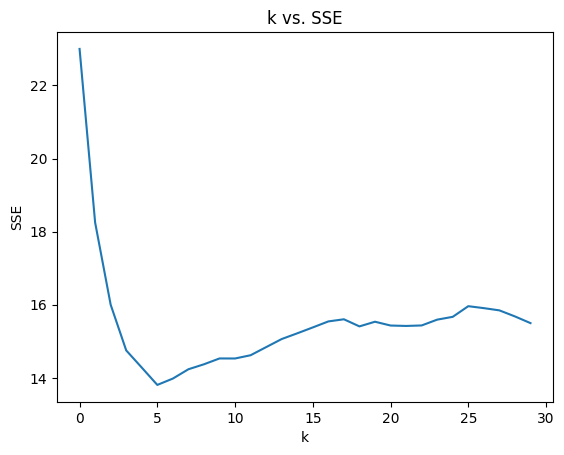

The optimal k-value of range [1, 30] is 6
The SSE for the optimal k-value is [13.80555556]


In [37]:
from sklearn.neighbors import KNeighborsRegressor
k_test = np.arange(1,30)
sse_test = np.zeros(30)

for k in range(30):
    fitted_model = KNeighborsRegressor(n_neighbors=k+1).fit(X_train,y_train)
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    sse_test[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE

# k = [3, 10, 25, 50, 100, 300]
plt.plot(np.arange(0,30), sse_test) # Plot SSE by k
# plt.plot(k, sse)
plt.xlabel("k")
plt.title("k vs. SSE")
plt.ylabel('SSE')
plt.show()

# index = np.where(sse==np.min(sse))[0]
# print("The optimal k-value of the ones tested above is " + str(k[index[0]]))
min_index = np.where(sse_test==np.min(sse_test))[0]
print("The optimal k-value of range [1, 30] is " + str(k_test[min_index[0]]))
print("The SSE for the optimal k-value is " + str(sse_test[min_index]))

              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.0

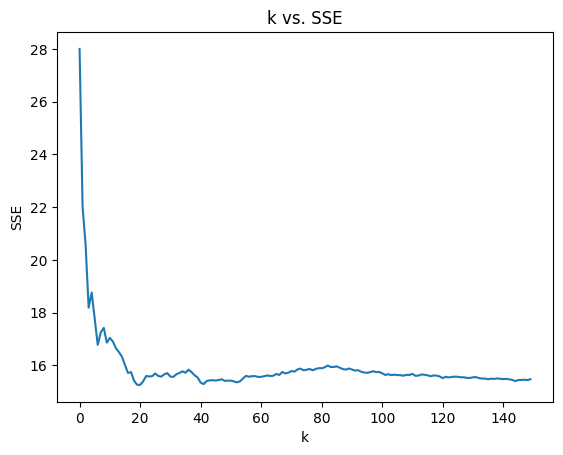

The optimal k-value of range [1, 150] is 21
The SSE for the optimal k-value is [15.25623583]


In [38]:
X = df.drop('DEATH_EVENT',axis=1)
print(X.describe())
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

k_test = np.arange(1,150)
sse_test = np.zeros(150)

for k in range(150):
    fitted_model = KNeighborsRegressor(n_neighbors=k+1).fit(X_train,y_train)
    y_hat = fitted_model.predict(X_test)
    sse_test[k] = np.sum( (y_test-y_hat)**2 )

# k = [3, 10, 25, 50, 100, 300]
plt.plot(np.arange(0,150), sse_test) # Plot SSE by k
# plt.plot(k, sse)
plt.xlabel("k")
plt.title("k vs. SSE")
plt.ylabel('SSE')
plt.show()

# index = np.where(sse==np.min(sse))[0]
# print("The optimal k-value of the ones tested above is " + str(k[index[0]]))
min_index = np.where(sse_test==np.min(sse_test))[0]
print("The optimal k-value of range [1, 150] is " + str(k_test[min_index[0]]))
print("The SSE for the optimal k-value is " + str(sse_test[min_index]))

The optimal k-value using all variables is 21, whereas just for the fewer, "higher predictor" variables it was 6. The model that used more variables had a slightly higher sum of squared error, so I would likely use fewer variables for this particular situation. The SSE did not change much across changes in the number of variables (<~5), and thus more variables are not always better. There could also be the tradeoff where more variables may end up overfitting the data.

**Q3.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)